<a href="https://colab.research.google.com/github/HaloSigner/MOFA-_practice/blob/main/mofa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import scanpy as sc
import muon as mu
import mofax as mofa
import numpy as np
import pandas as pd

In [51]:
import os

In [52]:
obs = pd.read_csv('CLL_metadata.tsv', sep='\t', index_col='sample')
obs

,Gender,age,TTT,TTD,treatedAfter,died,IGHV,trisomy12
sample,,,,,,,,
H005,m,75.265753,0.574949,2.625599,True,False,1.0,0.0
H006,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H007,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H008,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H010,f,72.780822,2.932238,2.932238,False,False,0.0,0.0
...,...,...,...,...,...,...,...,...
H266,m,74.315068,0.002738,0.903491,True,False,1.0,NaN
H268,m,82.539726,0.076660,0.577687,True,False,NaN,0.0
H270,f,66.947945,0.216290,0.903491,True,False,1.0,0.0


In [53]:
mods = {i:sc.AnnData(pd.read_csv(f'{i}.csv', index_col=0).T) for i in ('Drugs', 'Methylation', 'mRNA', 'Mutations')}
mods

{'Drugs': AnnData object with n_obs × n_vars = 200 × 310,
 'Methylation': AnnData object with n_obs × n_vars = 200 × 4248,
 'mRNA': AnnData object with n_obs × n_vars = 200 × 5000,
 'Mutations': AnnData object with n_obs × n_vars = 200 × 69}

In [54]:
for i in ['Drugs', 'Methylation', 'mRNA', 'Mutations']:
    i = pd.read_csv(f'{i}.csv')
    display(i)

,Unnamed: 0,H045,H109,H024,H056,H079,H164,H059,H167,H113,...,H178,H166,H174,H177,H259,H175,H179,H050,H180,H229
0,D_001_1,0.023639,0.073599,NaN,0.058139,0.020421,0.029627,0.027698,0.083659,0.124550,...,0.017446,0.098034,0.037301,0.021630,0.216052,0.016633,0.031748,0.073240,0.024204,0.164253
1,D_001_2,0.046233,0.106230,NaN,0.090220,0.047505,0.080546,0.080654,0.144984,0.191173,...,0.050334,0.249211,0.085705,0.031198,0.172555,0.027781,0.069265,0.100170,0.031940,0.273117
2,D_001_3,0.318747,0.273289,NaN,0.232215,0.363896,0.472599,0.476526,0.501206,0.280353,...,0.465141,0.641392,0.340710,0.216550,0.369776,0.267960,0.363209,0.194711,0.277069,0.473065
3,D_001_4,0.823703,0.717138,NaN,0.722574,0.807391,0.817914,0.793897,0.878447,0.639713,...,0.856400,0.958430,0.755982,0.677988,0.635756,0.722115,0.780845,0.570087,0.773591,0.798523
4,D_001_5,0.896278,0.885000,NaN,0.795750,0.879489,0.892796,0.948585,1.020959,0.854099,...,0.903901,1.046894,0.848875,0.856481,0.844765,0.836914,0.856436,0.767148,0.886351,1.000303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,D_CHK_1,1.056821,1.023215,NaN,0.915873,1.048188,0.785608,1.100000,1.000854,1.100000,...,0.839568,1.061016,1.100000,1.100000,0.863024,0.799764,0.968892,1.100000,0.966038,0.858270
306,D_CHK_2,1.100000,1.100000,NaN,1.093643,1.100000,1.027678,1.100000,1.100000,1.100000,...,1.100000,1.100000,1.100000,1.100000,1.067112,1.060345,1.100000,1.100000,1.100000,1.029654
307,D_CHK_3,1.040568,1.037670,NaN,1.100000,1.100000,1.028873,1.100000,1.091117,1.100000,...,1.100000,1.095576,1.100000,1.100000,1.100000,1.068526,1.100000,1.100000,1.100000,1.044861
308,D_CHK_4,0.993331,1.012460,NaN,1.074945,1.100000,0.984103,1.017727,1.072458,1.091361,...,1.075576,1.052688,1.100000,1.098112,1.100000,1.053148,1.090677,1.100000,1.054333,1.007097


,Unnamed: 0,H045,H109,H024,H056,H079,H164,H059,H167,H113,...,H178,H166,H174,H177,H259,H175,H179,H050,H180,H229
0,cg10146935,1.811086,-3.997508,-2.844313,-3.338656,-0.019362,-2.485997,-1.460211,-4.952291,-2.980209,...,-5.077259,-0.625954,-4.918812,-4.727493,-5.193812,-4.437189,-5.060459,NaN,NaN,NaN
1,cg26837773,-5.172572,1.594870,0.161170,-2.093433,3.748980,0.060530,-3.472232,0.547577,2.440098,...,-4.821910,-0.858200,3.214163,2.036858,-0.816088,4.043775,-2.345652,NaN,NaN,NaN
2,cg17801765,5.411526,5.412693,0.365706,0.373634,5.412010,5.268908,-4.989999,5.337081,0.749546,...,4.873615,0.753594,-0.628446,-4.584779,0.547390,4.086683,0.135581,NaN,NaN,NaN
3,cg13244315,-0.118825,1.043871,-4.219236,-1.592196,1.416418,4.659831,-0.461120,-1.918861,-1.237015,...,4.069311,3.287555,2.059305,2.244938,-0.210781,1.388141,-3.354897,NaN,NaN,NaN
4,cg06181703,5.120384,1.279480,0.721100,4.047059,5.237422,1.761247,4.543997,4.939463,4.781683,...,4.123456,2.817449,2.874335,-3.451370,-0.025308,4.143205,-3.581970,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,cg07600533,3.901933,2.634941,1.516759,-3.884756,-4.238106,-2.004915,1.596288,4.086832,-0.027165,...,3.823024,0.053674,-0.473871,3.547123,3.433890,3.653984,-3.766334,NaN,NaN,NaN
4244,cg08260245,5.713831,5.107460,5.676245,5.950338,6.040756,0.929815,5.603487,1.237379,1.057925,...,-1.077382,0.610930,3.458398,-0.793773,4.660379,4.388997,-0.594636,NaN,NaN,NaN
4245,cg19112186,5.703520,1.326244,5.488636,5.354059,5.584746,-0.539210,5.385392,0.915215,1.802086,...,0.421066,0.583761,4.432086,-0.008298,0.851485,3.245582,0.751461,NaN,NaN,NaN
4246,cg10770023,5.166255,0.677912,4.221828,4.934536,5.095111,-0.083568,5.202978,0.109868,4.331600,...,0.372515,0.378272,2.637359,0.031687,0.949804,4.690901,0.325863,NaN,NaN,NaN


,Unnamed: 0,H045,H109,H024,H056,H079,H164,H059,H167,H113,...,H178,H166,H174,H177,H259,H175,H179,H050,H180,H229
0,ENSG00000244734,4.558644,2.721512,9.938456,13.278004,6.086874,2.571839,4.938961,1.528848,2.286122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ENSG00000158528,11.741854,13.287432,2.341006,3.232874,11.940820,11.506818,5.483675,2.618869,2.812801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000198478,8.921456,2.721512,12.381452,8.106266,4.889503,12.756213,3.593890,4.119490,5.220041,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ENSG00000175445,12.686458,10.925985,1.528848,1.528848,13.340588,10.885547,11.194029,11.599981,2.286122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ENSG00000174469,2.644946,12.648355,1.528848,13.565210,5.476914,10.975187,7.944246,2.618869,2.286122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENSG00000111328,10.059942,10.361200,8.152703,7.737858,8.274131,9.069614,9.272260,9.321016,9.543043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,ENSG00000165474,1.528848,1.528848,1.528848,2.417160,2.270282,1.528848,1.528848,1.528848,1.528848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,ENSG00000164061,5.771337,5.359180,6.059008,5.495087,5.102382,6.212773,4.161332,6.411407,4.940975,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,ENSG00000166816,1.528848,2.383843,2.341006,3.232874,1.528848,1.528848,1.528848,3.037599,1.528848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Unnamed: 0,H045,H109,H024,H056,H079,H164,H059,H167,H113,...,H178,H166,H174,H177,H259,H175,H179,H050,H180,H229
0,gain2p25.3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
1,gain3q26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,1.0,NaN,0.0,NaN
2,del6p21.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
3,del6q21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,1.0,0.0,NaN,0.0,0.0
4,del8p12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,UMODL1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,VWF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,XPO1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,ZC3H18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
mdata=mu.MuData(mods)
mu.set_options(pull_on_update=False)

mdata.obs = mdata.obs.join(obs)

In [56]:
mdata

MuData object with n_obs × n_vars = 200 × 9627
  obs:	'Gender', 'age', 'TTT', 'TTD', 'treatedAfter', 'died', 'IGHV', 'trisomy12'
  4 modalities
    Drugs:	200 x 310
    Methylation:	200 x 4248
    mRNA:	200 x 5000
    Mutations:	200 x 69

# Integrate data #

In case some samples are missing from some of the modalities, as they are in this CLL dataset, muon cna be instructed to handle it. One of two modes has to be chosen for that:

1. use_obs='union', which will populate values for missing samples in certain modalities with NAs, or
2. use_obs='intersection', which will use a subset of samples that are present in all modalities


In [58]:
mu.tl.mofa(mdata, use_obs='union',
           n_factors=10, convergence_mode='medium',
           outfile='models/CLL_union.hdf5')


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='Drugs' group='group1' with N=200 samples and D=310 features...
Loaded view='Methylation' group='group1' with N=200 samples and D=4248 features...
Loaded view='mRNA' group='group1' with N=200 samples and D=5000 features...
Loaded view='Mutations' group='group1' with N=200 samples and D=69 features...


Model options:
- Automatic Relevance Determination prior on the f

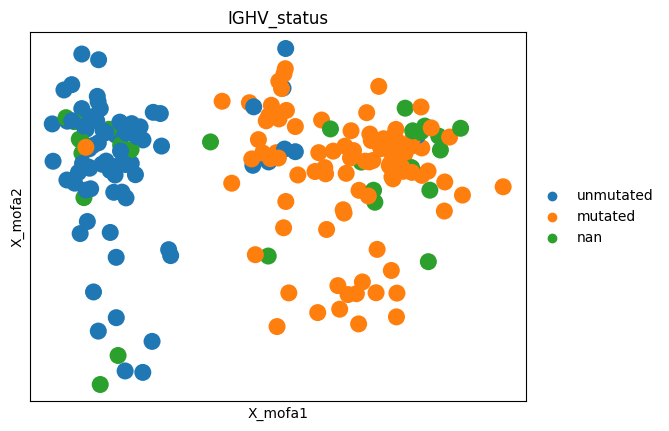

In [59]:
mdata.obs['IGHV_status'] = mdata.obs['IGHV'].astype(str).astype('category').cat.rename_categories({"1.0": "mutated", "0.0": "unmutated"})
mu.pl.mofa(mdata, color='IGHV_status')

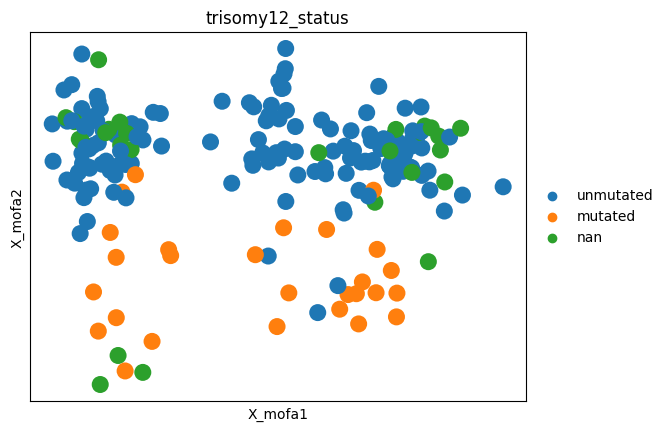

In [60]:
mdata.obs['trisomy12_status'] = mdata.obs['trisomy12'].astype(str).astype("category").cat.rename_categories({"1.0": "mutated", "0.0": "unmutated"})
mu.pl.mofa(mdata, color="trisomy12_status")

In [61]:
model = mofa.mofa_model('models/CLL_union.hdf5')
model

MOFA+ model: CLL union
Samples (cells): 200
Features: 9627
Groups: group1 (200)
Views: Drugs (310), Methylation (4248), Mutations (69), mRNA (5000)
Factors: 10
Expectations: W, Z

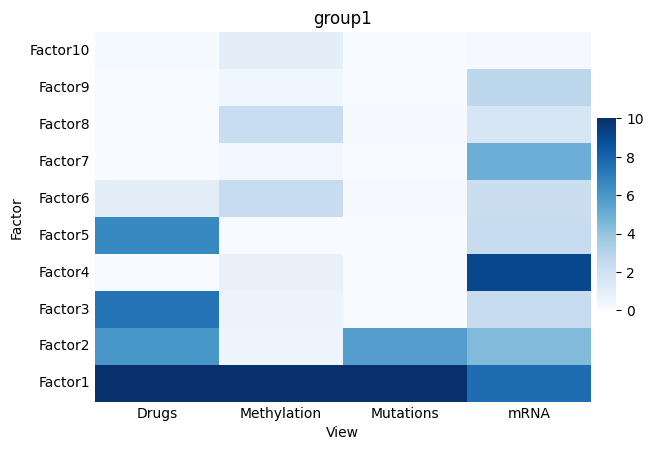

In [62]:
mofa.plot_r2(model, x='View', vmax=10)

<Axes: >

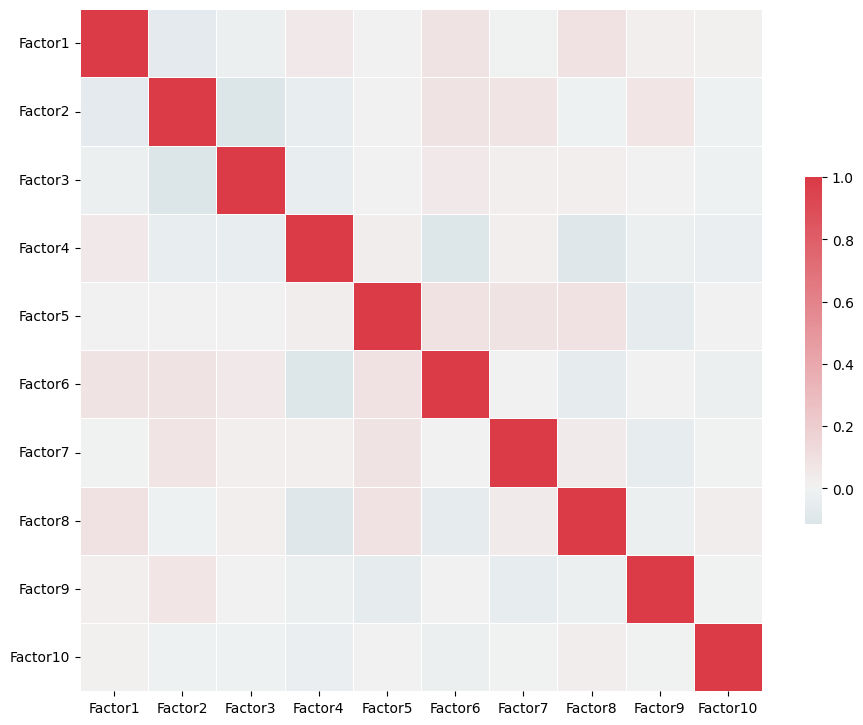

In [63]:
mofa.plot_weights_correlation(model)

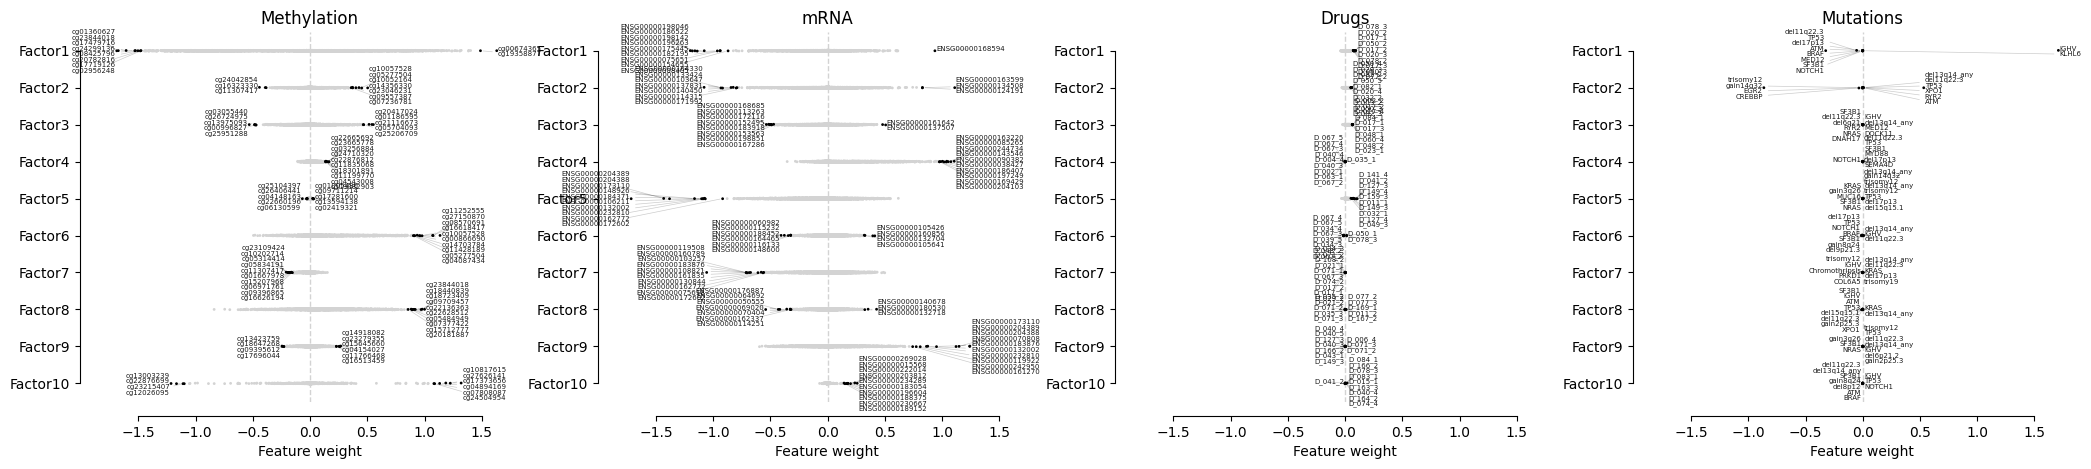

In [64]:
ax = mofa.plot_weights(model, n_features=10,
                       y_repel_coef=0.04, x_rank_offset=-150)

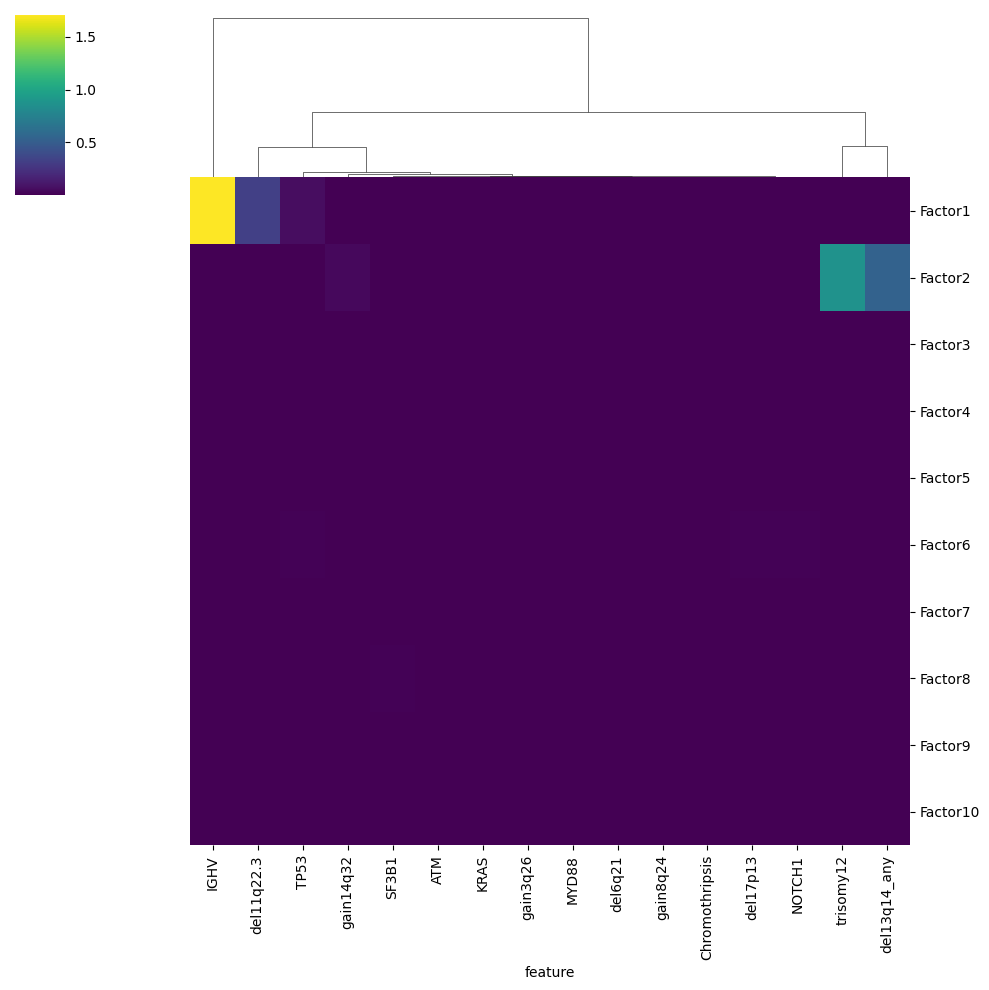

In [65]:
mofa.plot_weights_heatmap(model, n_features=5, factors=range(0,10), w_abs=True, cmap='viridis', cluster_factors=False, view=['Mutations'])

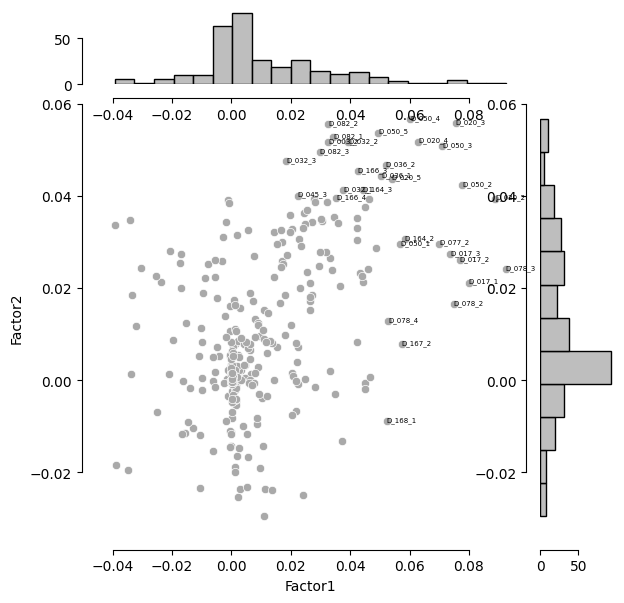

In [66]:
mofa.plot_weights_scatter(model, x="Factor1", y="Factor2",view=["Drugs"],
                         hist=True, n_features=20)

<Axes: title={'center': 'mRNA'}, xlabel='Feature weight'>

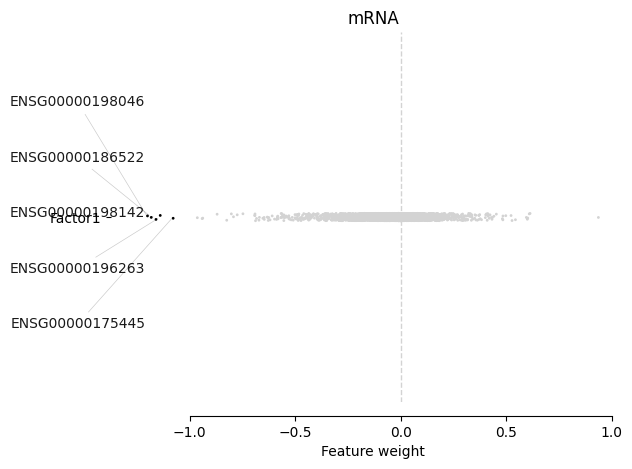

In [67]:
mofa.plot_weights(model, views=['mRNA'], factors=0, zero_line=True, ncols=2, label_size=10)

<Axes: title={'center': 'Mutations'}, xlabel='Feature weight'>

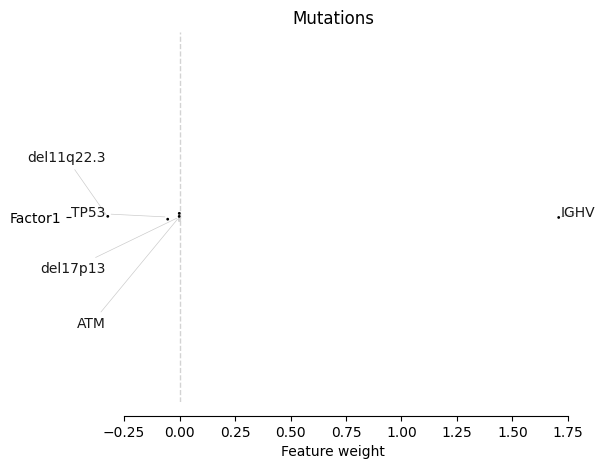

In [68]:
mofa.plot_weights(model, views=[ 'Mutations'], factors=0, zero_line=True, ncols=2, label_size=10)

<Axes: title={'center': 'Drugs'}, xlabel='Feature weight'>

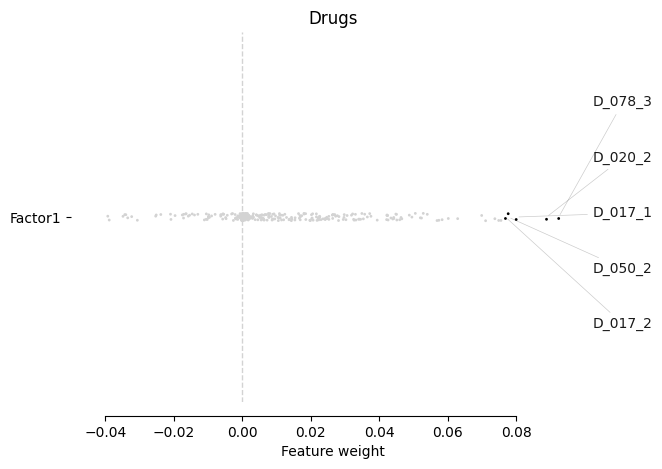

In [69]:
mofa.plot_weights(model, views=['Drugs'], factors=0, label_size=10)

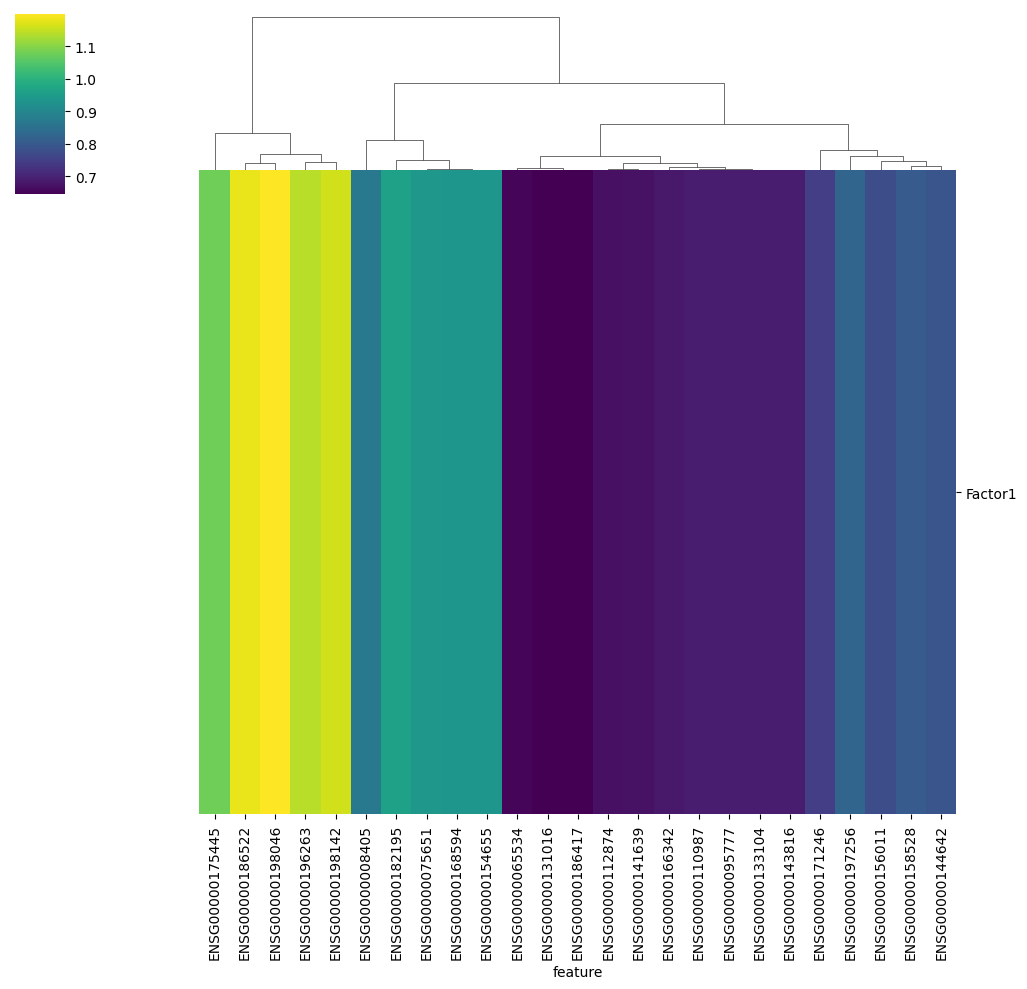

In [70]:
mofa.plot_weights_heatmap(model, n_features=25,  factors=0, w_abs=True, cmap='viridis', cluster_factors  = False, view=["mRNA"])

In [76]:
!jupyter nbconvert --to html mofa.ipynb

[NbConvertApp] Converting notebook mofa.ipynb to html
[NbConvertApp] Writing 293975 bytes to mofa.html


In [72]:
!pip install pdfkit
!sudo apt-get install -y wkhtmltopdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking
  glib-networking-common glib-networking-services gsettings-desktop-schemas
  iio-sensor-proxy libavahi-core7 libavahi-glib1 libdaemon0 libevdev2
  libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0
  libmbim-glib4 libmbim-proxy libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200
  libnotify4 libnss-mdns libproxy1v5 libqmi-glib5 libqmi-proxy libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5 libqt5printsupport5
  libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1
  libsoup2.4-common libudev1 libwacom-bin libwacom-common libwacom9 libwoff1
  libxcb-icccm4 libxcb-image0 libxcb-keysyms1 libxcb-render-util0 

In [78]:
import pdfkit

pdfkit.from_file('mofa.html', 'mofa.pdf')

True

In [79]:
from google.colab import files
files.download('mofa.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>